## Load basic Libraries and dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv
from sklearn.model_selection import train_test_split                         
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [31]:
from sklearn.datasets import load_iris

In [32]:
Iris = load_iris()

In [9]:
Iris.data.shape

(150, 4)

In [10]:
Iris.target.shape

(150,)

In [12]:
Iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
Iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## Convert the Data into Pandas Dataframe

In [11]:
df = pd.DataFrame(Iris.data, columns=Iris.feature_names)
df['target'] = Iris.target

In [12]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [14]:
df.shape

(150, 5)

In [15]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [16]:
print(df.groupby('target').size())

target
0    50
1    50
2    50
dtype: int64


In [17]:
from matplotlib import pyplot

## Data Visualization

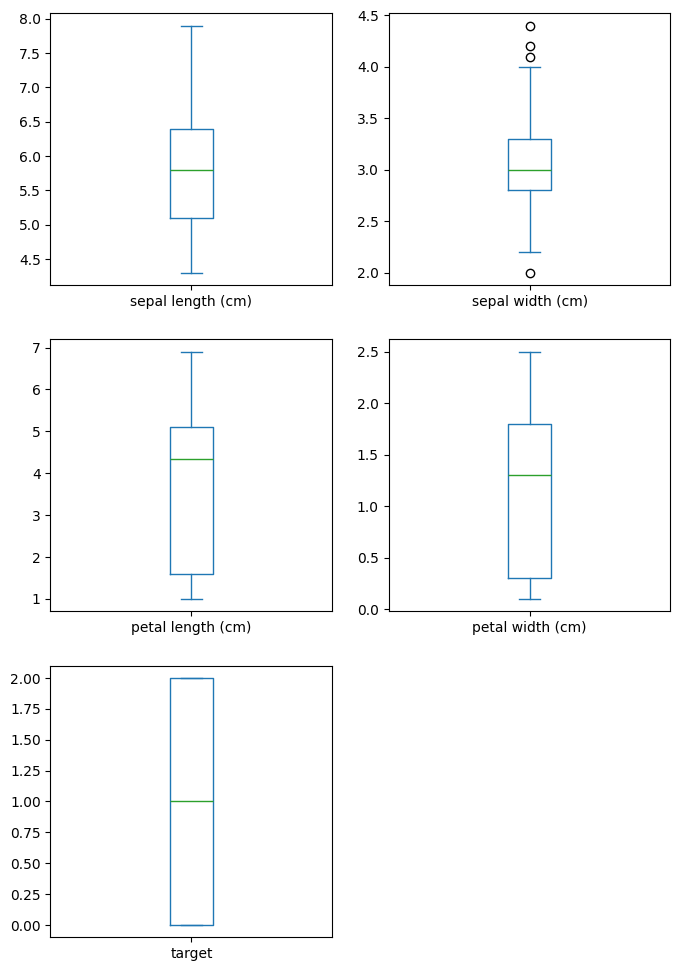

In [18]:
# box amd whisker plots
df.plot(kind='box', subplots=True, layout=(3,2), sharex=False, sharey=False, figsize=(8,12))
pyplot.show()

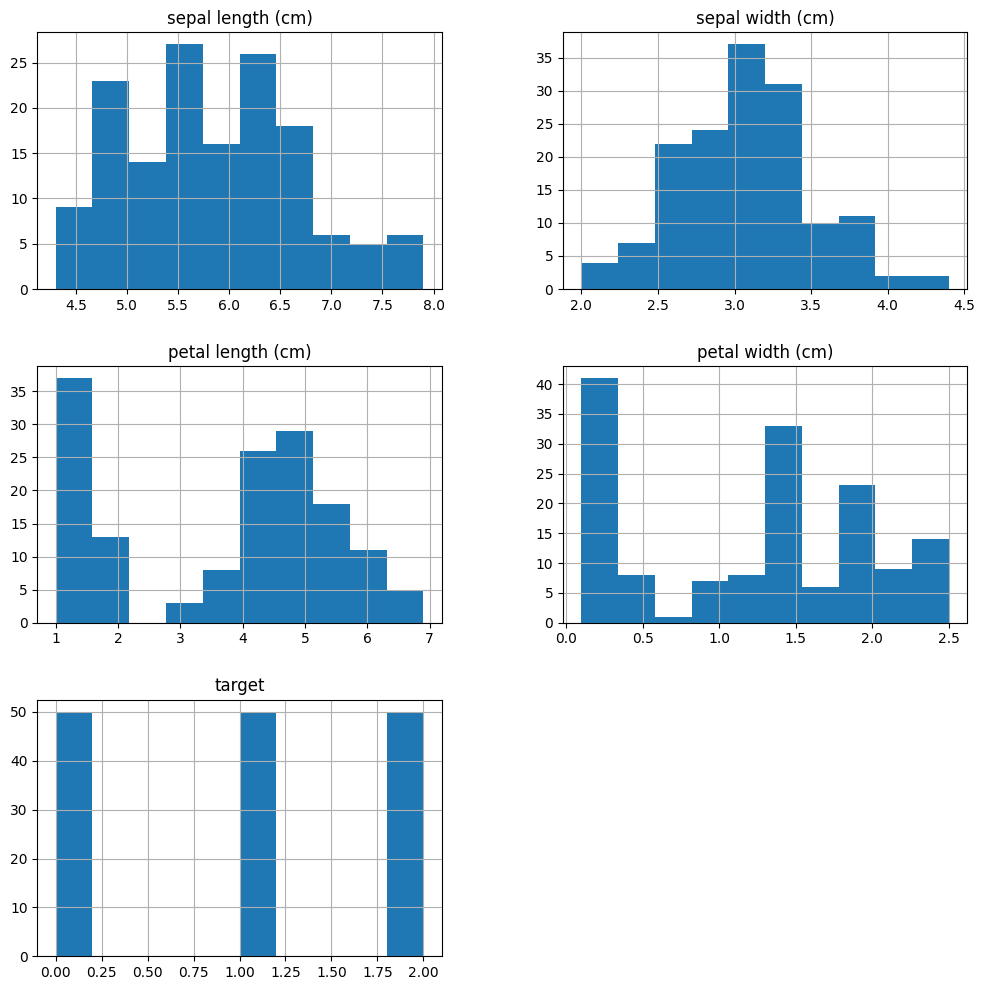

In [19]:
df.hist(figsize=(12,12))
pyplot.show()

In [ ]:
## Find the Correlation between the features and the target

In [20]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


<Axes: >

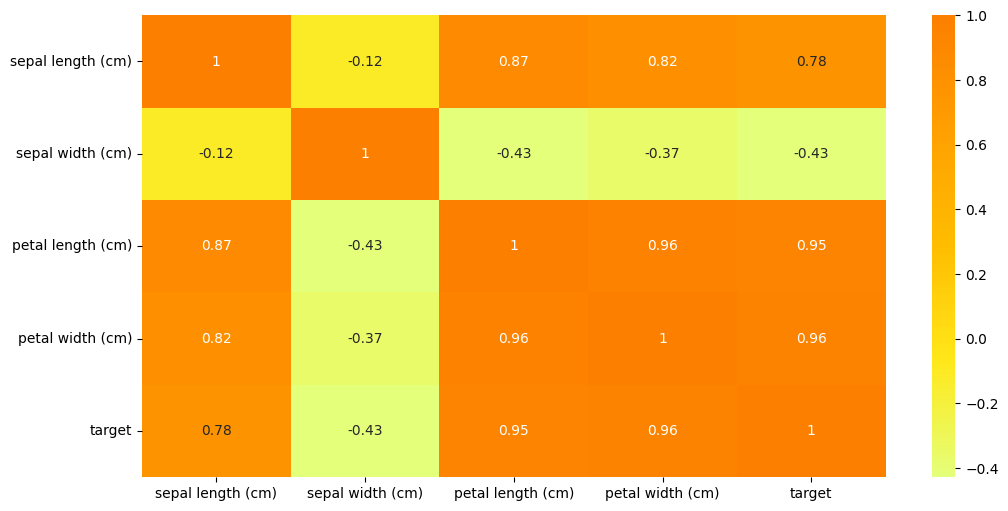

In [21]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap='Wistia')

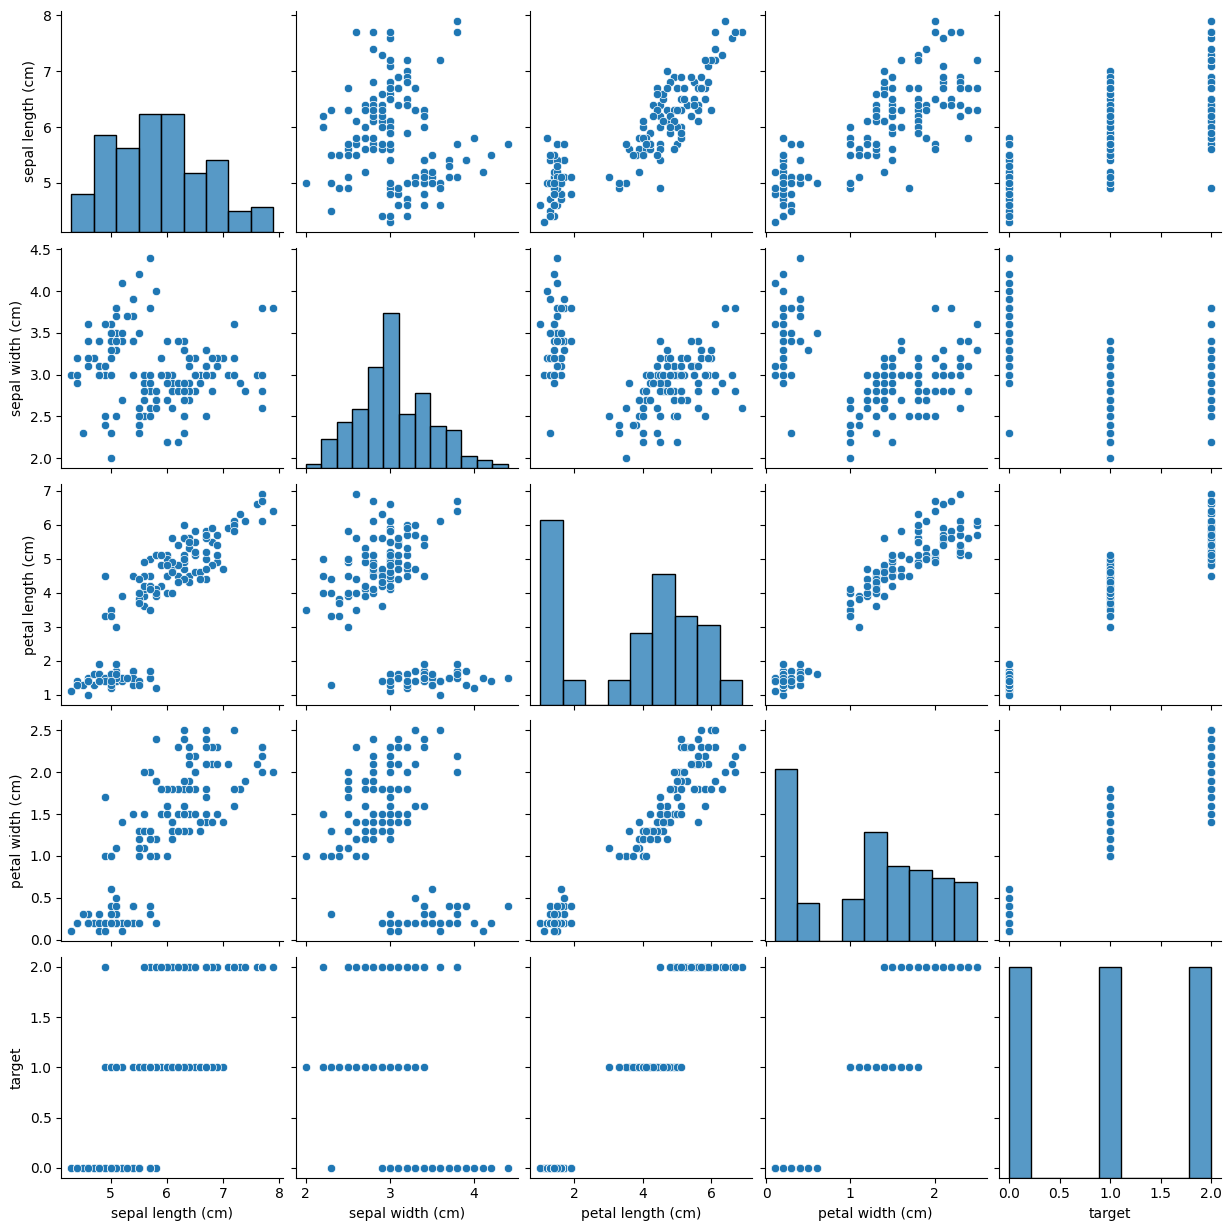

In [22]:
sns.pairplot(df)

##  Evaluate the Algorithms

In [23]:
# split out validation dataset
array = df.values
X = array[:, 0:4]
Y = array[:, 4]
validation_size=.20
seed= 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y, test_size=validation_size, random_state= seed)

In [26]:
# spot check algorithms
models=[]
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model
results = []
names = []

# choose one of the two fixes
kfold = KFold(n_splits=10, shuffle=True, random_state=42)  # reproducible

for name, model in models:
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.991667 (0.025000)
LDA: 0.975000 (0.053359)
KNN: 0.983333 (0.033333)
CART: 0.983333 (0.033333)
NB: 0.975000 (0.038188)
SVM: 0.991667 (0.025000)


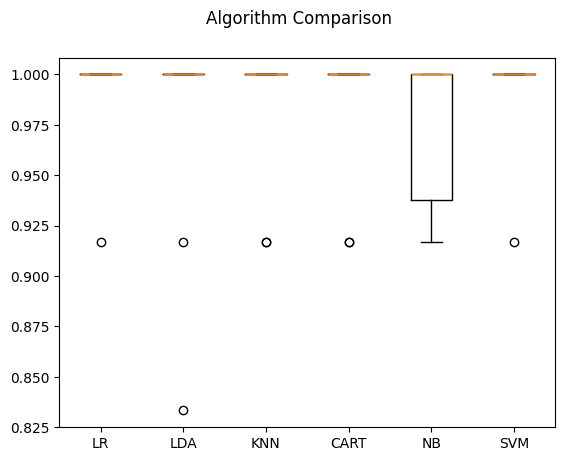

In [27]:
# compare the algorthims
fig= pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax= fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()


## Make Predictions

In [28]:
# make predictions on validation datasets

SVM = SVC()
SVM.fit(X_train, Y_train)
predictions= SVM.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
                         

0.8666666666666667
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         7
         1.0       0.83      0.83      0.83        12
         2.0       0.82      0.82      0.82        11

    accuracy                           0.87        30
   macro avg       0.88      0.88      0.88        30
weighted avg       0.87      0.87      0.87        30

[[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]


In [ ]:
## Accuracy is 93% : the model can predict with 93% accuracy on unseen data. 
#Hence it is a good  and is less likely to make mistakes
# confusion matrix shows 2 errors made
# classification report gives details about precision, recall, f-1 score and support